# ESTIMATING "RELATIVE PHYSICAL FATIGUE INDEX" OF PLAYERS USING ICE HOCKEY METRICS

#### **Objective:** To develop an application that enables coaches to input match data and obtain instant feedback on potential fatigue levels,based on the dataset's metrics.

#### **Functionality:** Upload data files and obtain instant feedback on potential fatigue levels.

#### **Applications:**

1. **Player Management and Rotation:**
   Use the Fatigue Index (FI) to guide real-time player rotation decisions, optimizing performance and minimizing injury risks.

2. **Injury Prevention in Training:**
   Incorporate FI to tailor training intensity and recovery, reducing the likelihood of player injuries.

3. **Performance Analysis and Strategy:**
   Integrate FI with performance metrics to refine game strategies, making informed in-game decisions for optimal outcomes.


### DATA LOADING AND PREPROCESSING


In [191]:
# Import required Libraries
import pandas as pd

import matplotlib.pyplot as plt

In [192]:
# # We change the delimiter to ',' and save the file for ease of use
# df_lugano.to_csv("lugano.csv", sep=",", index=False)
# df_lugano.to_csv("zsc.csv", sep=",", index=False)

In [193]:
# Load the datasets into Pandas DataFrame
df_lugano = pd.read_csv("lugano.csv", encoding="ISO-8859-1")
# df_zsc = pd.read_csv("zsc.csv", encoding="ISO-8859-1")

# Print the first 5 rows of the datasets
df_lugano.head()

,Group name,League ID,Description,Session ID,Types,Session end (Local timezone),Session end date (Local timezone),Session end date (UTC),Session end time (Local timezone),Session end time (UTC),...,Sprints / min (medium),Sprints / min (high),Sprints / min (very high),Sprints / min (near max),Turns,Sharp Turns,Wide Turns,Turns / min,Sharp Turns / min,Wide Turns / min
0,Defense,NaN,vs Lugano,194,Match,16.11.2022 22:09:47,16.11.2022,16.11.2022,22:09:47,21:09:47,...,"0,35","0,06",0,0,33,10,23,"1,91","0,58","1,33"
1,Offense,NaN,vs Lugano,194,Match,16.11.2022 22:09:47,16.11.2022,16.11.2022,22:09:47,21:09:47,...,"1,04","0,7","0,17",0,56,9,47,"4,88","0,78","4,09"
2,Offense,NaN,vs Lugano,194,Match,16.11.2022 22:09:47,16.11.2022,16.11.2022,22:09:47,21:09:47,...,"0,58","0,32","0,26",0,48,6,42,"3,09","0,39","2,7"
3,Offense,NaN,vs Lugano,194,Match,16.11.2022 22:09:47,16.11.2022,16.11.2022,22:09:47,21:09:47,...,"0,86","0,4","0,12",0,58,12,46,"3,34","0,69","2,65"
4,Defense,NaN,vs Lugano,194,Match,16.11.2022 22:09:47,16.11.2022,16.11.2022,22:09:47,21:09:47,...,"1,96",0,0,0,2,0,2,"1,31",0,"1,31"


In [194]:
# List of columns to keep in the dataset
columns_to_keep = [
    "Group name",
    "Position",
    "Description",
    "Duration (s)",
    "Distance (m)",
    "Time on Ice (s)",
    "High Metabolic Power Distance (m)",
    "Mechanical Intensity",
]

# Create a new DataFrame with only the recommended columns to keep
df_imp_lugano = df_lugano[columns_to_keep]
# print(df_imp_lugano)

In [195]:
# add a new column called player id to the dataframe and fill it with the player id starting from 1 using .loc as the first column

df_imp_lugano.insert(loc=0, column="Player ID", value=range(1, 1 + len(df_imp_lugano)))

df_imp_lugano.head(50)

,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity
0,1,Defense,D,vs Lugano,8836,3163,1038,1287,"45,94"
1,2,Offense,F,vs Lugano,8836,2881,689,1724,"42,85"
2,3,Offense,F,vs Lugano,8836,3586,932,2090,"46,12"
3,4,Offense,F,vs Lugano,8836,3881,1043,1956,"44,38"
4,5,Defense,D,vs Lugano,8836,354,92,179,"44,95"
5,6,Defense,D,vs Lugano,8836,5087,1360,2501,"41,27"
6,7,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,"19,29"
7,8,Offense,F,vs Lugano,8836,4683,1162,2758,"44,56"
8,9,Offense,F,vs Lugano,8836,4009,1239,2066,"38,62"
9,10,Defense,D,vs Lugano,8836,4383,1307,1913,"45,25"


In [196]:
# Check the data types of the columns
df_imp_lugano.dtypes

Player ID                             int64
Group name                           object
Position                             object
Description                          object
Duration (s)                          int64
Distance (m)                          int64
Time on Ice (s)                       int64
High Metabolic Power Distance (m)     int64
Mechanical Intensity                 object
dtype: object

In [197]:
# Convert the data type of the column mechanical intensity from string to float

df_imp_lugano["Mechanical Intensity"] = (
    df_imp_lugano["Mechanical Intensity"].str.replace(",", ".").astype(float)
)

# Check the data types of the columns
df_imp_lugano.dtypes

C:\Users\samue\AppData\Local\Temp\ipykernel_17496\649008270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_lugano["Mechanical Intensity"] = (


Player ID                              int64
Group name                            object
Position                              object
Description                           object
Duration (s)                           int64
Distance (m)                           int64
Time on Ice (s)                        int64
High Metabolic Power Distance (m)      int64
Mechanical Intensity                 float64
dtype: object

### CONCEPTUAL FRAMEWORK AND METHODOLOGY

Given the anonymized nature and the small sample size of our dataset, combined with numerous variables at play, we've made certain assumptions to ensure its suitable for our use-case. Here’s our approach to understanding player fatigue:

1. **Picking Player Data:**
   Due to lack of player identification data, we had to infer that first 21 rows represent individual player data. This is based on the understanding that a hockey team typically consists of 20 players. This selection ensures we capture data for each unique player.

2. **Identifying Player Roles:**
   We assess the 'Position' column to differentiate between a forward (FW), defenseman (D) and Goalkeeper. The roles they play on the ice rink might result in different fatigue levels.

3. **Data Segmentation:**
   With hundreds of variables present, we narrow down and segment data by recommended metrics from the icehockey club. This targeted analysis aids in the precise estimation of the Fatigue Index (FI).

4. **Developing the Fatigue Formula:**
   Using a combination of the dataset metrics, we create a formula that captures the aspects of player fatigue. This formula is designed to be sensitive to player roles, game dynamics, and other key factors.

5. **Fatigue Estimation:**
   Using the curated data from the previous steps, we derive the Fatigue Index (FI).

6. **Visualization:**
   We design a clear and easy-to-understand graphic to show the fatigue levels. This helps coaches quickly see and understand player tiredness.


In [198]:
# As we want only unique player data, we select only the first 21 rows of the dataframe
# which are Description = "vs Lugano"
# We infer that because an ice hockey team typically consists of 20 players, including 2 goaltenders and 18 skaters.
# and "vs Lugano" implies that that row is for the match data NOT period data.
# and the proportion of forwards to defensemen
df_imp_lugano_match = df_imp_lugano[df_imp_lugano["Description"] == "vs Lugano"]
# df_imp_lugano_match = df_imp_lugano.iloc[0:21, :]
# df_imp_lugano_match
df_imp_lugano_match

,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity
0,1,Defense,D,vs Lugano,8836,3163,1038,1287,45.94
1,2,Offense,F,vs Lugano,8836,2881,689,1724,42.85
2,3,Offense,F,vs Lugano,8836,3586,932,2090,46.12
3,4,Offense,F,vs Lugano,8836,3881,1043,1956,44.38
4,5,Defense,D,vs Lugano,8836,354,92,179,44.95
5,6,Defense,D,vs Lugano,8836,5087,1360,2501,41.27
6,7,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,19.29
7,8,Offense,F,vs Lugano,8836,4683,1162,2758,44.56
8,9,Offense,F,vs Lugano,8836,4009,1239,2066,38.62
9,10,Defense,D,vs Lugano,8836,4383,1307,1913,45.25


In [199]:
# Check if any NA in Each Row of the match dataframe
print(df_imp_lugano_match.isnull().sum(axis=1))
# df_imp_lugano.isna().any(axis=1)

# We see there are no NA values in the match dataframe

# Check if any NA in Each Column of the dataframe
print(df_imp_lugano.isnull().sum(axis=0))

# We see 14 NA values in the column "Mechanical Intensity"

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64
Player ID                             0
Group name                            0
Position                              0
Description                           0
Duration (s)                          0
Distance (m)                          0
Time on Ice (s)                       0
High Metabolic Power Distance (m)     0
Mechanical Intensity                 14
dtype: int64


#### Drop the rows with NA values


In [200]:
# Inspect the rows with NA values in the column "Mechanical Intensity"
print(df_imp_lugano[df_imp_lugano["Mechanical Intensity"].isna()])

# We can safely drop these rows as we clearly see no metric values are present in these rows
df_imp_lugano.dropna(inplace=True)

     Player ID Group name Position Description  Duration (s)  Distance (m)  \
34          35    Offense        F    Period 1          1736             0   
46          47    Defense        D    Period 2          2229             0   
55          56    Offense        F    Period 2          2229             0   
67          68    Defense        D    Period 3          2074             0   
76          77    Offense        F    Period 3          2074             0   
83          84    Defense        D    Overtime           129             0   
84          85    Offense        F    Overtime           129             0   
87          88    Defense        D    Overtime           129             0   
91          92    Offense        F    Overtime           129             0   
95          96    Defense        F    Overtime           129             0   
96          97    Offense        F    Overtime           129             0   
98          99    Offense        F    Overtime           129    

C:\Users\samue\AppData\Local\Temp\ipykernel_17496\3311891688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_lugano.dropna(inplace=True)


In [201]:
# Calculate the ratio of forwards to defensemen using position column

df_imp_lugano_match["Position"].value_counts()

Position
F             14
D              6
Goalkeeper     1
Name: count, dtype: int64

In [202]:
# Calculate ratio of F to D
F = df_imp_lugano_match["Position"].value_counts()[0]
D = df_imp_lugano_match["Position"].value_counts()[1]
ratio = F / D

# print ratio as a fraction

print(ratio)

2.3333333333333335


C:\Users\samue\AppData\Local\Temp\ipykernel_17496\88953955.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  F = df_imp_lugano_match["Position"].value_counts()[0]
C:\Users\samue\AppData\Local\Temp\ipykernel_17496\88953955.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  D = df_imp_lugano_match["Position"].value_counts()[1]


### CREATING A RELATIVE FATIGUE LEVEL FORMULA

- Typically involves empirical research, biomechanics, and physiological considerations.
- However, we propose a simple, hypothetical formula to estimate fatigue.
- DISCLAIMER : This is a rough estimation and not based on scientific research.
- Using the important metrics recommended by the Ice Hockey Club & Professor Martin Rumo, we attempt to create a formula that can be used to estimate fatigue levels.


#### Relative Fatigue Index (RFI) = [A * (Time on ice/ Match Duration) + B * (High Metabolic Power Distance / Total Distance) + C * (Mechanical Intensity)]

- TIME FACTOR : Percentage of Time spent on Ice. Here, the idea is simple: the more time a player spends on the ice, the more fatigued they're likely to be.

- DISTANCE OR INTENSITY FACTOR : Percentage of the distance covered at high intensities. It's a straightforward indicator of how hard a player pushed themselves relative to their overall activity. It is the distance covered at high metabolic power divided by the total distance covered.

- MECHANICAL OR LOAD INTENSITY : How intense a player's session was concerning accelerations and decelerations.It models the intensity of a session or phase and provides important information about its impact on the lower limbs. It is the Mechanical Load divided by the total time in minutes.

- A, B, and C: Weights assigned to each of the factors. These weights are determined by the coach based on the importance of each factor in the context of the team's strategy and the coach's philosophy.


### FOR MATCH DATA


#### NORMALIZE MECHANICAL INTENSITY (MATCH DATA)


In [203]:
# First we need to normalize the Mechanical Intensity column, so that the values are between 0 and 1
# This is to make sure that it can be added to TIME FACTOR, and DISTANCE FACTOR which are ratios in the next step
# With historical data, from the clubs, min and max intensities can be adjusted further in the future to normalize the intensity

min_val = df_imp_lugano_match["Mechanical Intensity"].min()
max_val = df_imp_lugano_match["Mechanical Intensity"].max()

df_imp_lugano_match["Normalized Mechanical Intensity"] = (
    df_imp_lugano_match["Mechanical Intensity"] - min_val
) / (max_val - min_val)

df_imp_lugano_match

C:\Users\samue\AppData\Local\Temp\ipykernel_17496\2183847093.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_lugano_match["Normalized Mechanical Intensity"] = (


,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Normalized Mechanical Intensity
0,1,Defense,D,vs Lugano,8836,3163,1038,1287,45.94,0.961371
1,2,Offense,F,vs Lugano,8836,2881,689,1724,42.85,0.871624
2,3,Offense,F,vs Lugano,8836,3586,932,2090,46.12,0.966599
3,4,Offense,F,vs Lugano,8836,3881,1043,1956,44.38,0.916062
4,5,Defense,D,vs Lugano,8836,354,92,179,44.95,0.932617
5,6,Defense,D,vs Lugano,8836,5087,1360,2501,41.27,0.825733
6,7,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,19.29,0.187337
7,8,Offense,F,vs Lugano,8836,4683,1162,2758,44.56,0.921290
8,9,Offense,F,vs Lugano,8836,4009,1239,2066,38.62,0.748766
9,10,Defense,D,vs Lugano,8836,4383,1307,1913,45.25,0.941330


#### CREATE RELATIVE FATIGUE INDEX (RFI) FUNCTION


In [204]:
def fatigue_index(df, A=1, B=1, C=1):
    """This function calculates the fatigue index for each player."""
    return (
        A * (df["Time on Ice (s)"] / df["Duration (s)"])
        + B * df["High Metabolic Power Distance (m)"] / df["Distance (m)"]
    ) + C * df["Normalized Mechanical Intensity"]


# test the function
A = 1
B = 1
C = 1

fatigue_index(df_imp_lugano_match, A, B, C)

0     1.485737
1     1.548003
2     1.654899
3     1.538095
4     1.448679
5     1.471295
6     0.647389
7     1.641736
8     1.404328
9     1.525707
10    1.669477
11    0.951123
12    1.532141
13    0.001019
14    1.403397
15    1.548994
16    1.517963
17    1.519416
18    1.453339
19    1.443519
20    1.616113
dtype: float64

#### FATIGUE INDEX CALCULATION (MATCH DATA)


In [205]:
# 1. Compute the intermediate fatigue index for each row
df_imp_lugano_match["Fatigue Index"] = df_imp_lugano_match.apply(fatigue_index, axis=1)

# 2. Normalize the fatigue index
min_fatigue = df_imp_lugano_match["Fatigue Index"].min()
max_fatigue = df_imp_lugano_match["Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_imp_lugano_match["Normalized Fatigue Index"] = (
    df_imp_lugano_match["Fatigue Index"] - min_fatigue
) / (max_fatigue - min_fatigue) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_imp_lugano_match_sorted = df_imp_lugano_match.sort_values(
    by="Normalized Fatigue Index", ascending=True
)

df_imp_lugano_match_sorted

C:\Users\samue\AppData\Local\Temp\ipykernel_17496\3140303971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_lugano_match["Fatigue Index"] = df_imp_lugano_match.apply(fatigue_index, axis=1)
C:\Users\samue\AppData\Local\Temp\ipykernel_17496\3140303971.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_lugano_match["Normalized Fatigue Index"] = (


,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index
13,14,Offense,F,vs Lugano,8836,21,9,0,12.84,0.000000,0.001019,1.000000
6,7,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,19.29,0.187337,0.647389,1.387406
11,12,Defense,D,vs Lugano,8836,4771,1396,1499,29.33,0.478943,0.951123,1.569450
14,15,Defense,D,vs Lugano,8836,5223,1485,2555,38.53,0.746152,1.403397,1.840523
8,9,Offense,F,vs Lugano,8836,4009,1239,2066,38.62,0.748766,1.404328,1.841081
19,20,Offense,F,vs Lugano,8836,2595,609,1465,40.73,0.810049,1.443519,1.864571
4,5,Defense,D,vs Lugano,8836,354,92,179,44.95,0.932617,1.448679,1.867663
18,19,Offense,F,vs Lugano,8836,4039,1034,2047,41.40,0.829509,1.453339,1.870456
5,6,Defense,D,vs Lugano,8836,5087,1360,2501,41.27,0.825733,1.471295,1.881218
0,1,Defense,D,vs Lugano,8836,3163,1038,1287,45.94,0.961371,1.485737,1.889874


#### CREATE FUNCTION TO CALCULATE THE FATIGUE INDEX FOR EACH PLAYER


#### COLOR CATEGORIZATION OF FATIGUE LEVELS


In [206]:
# MANUAL THRESHOLD BASED CATEGORIZATION OF FATIGUE INDEX

# Fixed thresholds
high_threshold = 1.57
low_threshold = 1


# Categorize values based on manual thresholds
df_imp_lugano_match_sorted["Fatigue Category"] = pd.cut(
    df_imp_lugano_match_sorted["Fatigue Index"],
    [0, low_threshold, high_threshold, 2],  # Explicitly using 2 as max value
    labels=["Low", "Medium", "High"],
    include_lowest=True,
)

# Display the results

df_imp_lugano_match_sorted.head(
    21
)  # [["Player ID", "Relative Fatigue Index", "Fatigue Category"]]

,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index,Fatigue Category
13,14,Offense,F,vs Lugano,8836,21,9,0,12.84,0.000000,0.001019,1.000000,Low
6,7,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,19.29,0.187337,0.647389,1.387406,Low
11,12,Defense,D,vs Lugano,8836,4771,1396,1499,29.33,0.478943,0.951123,1.569450,Low
14,15,Defense,D,vs Lugano,8836,5223,1485,2555,38.53,0.746152,1.403397,1.840523,Medium
8,9,Offense,F,vs Lugano,8836,4009,1239,2066,38.62,0.748766,1.404328,1.841081,Medium
19,20,Offense,F,vs Lugano,8836,2595,609,1465,40.73,0.810049,1.443519,1.864571,Medium
4,5,Defense,D,vs Lugano,8836,354,92,179,44.95,0.932617,1.448679,1.867663,Medium
18,19,Offense,F,vs Lugano,8836,4039,1034,2047,41.40,0.829509,1.453339,1.870456,Medium
5,6,Defense,D,vs Lugano,8836,5087,1360,2501,41.27,0.825733,1.471295,1.881218,Medium
0,1,Defense,D,vs Lugano,8836,3163,1038,1287,45.94,0.961371,1.485737,1.889874,Medium


#### VISUALIZATION OF FATIGUE INDEX FOR EACH PLAYER


c:\Users\samue\switchdrive\SyncVM\MscIds Course Materials\3rd Semester\Sport Data Analytics\SDA-code\ice-venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\samue\switchdrive\SyncVM\MscIds Course Materials\3rd Semester\Sport Data Analytics\SDA-code\ice-venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


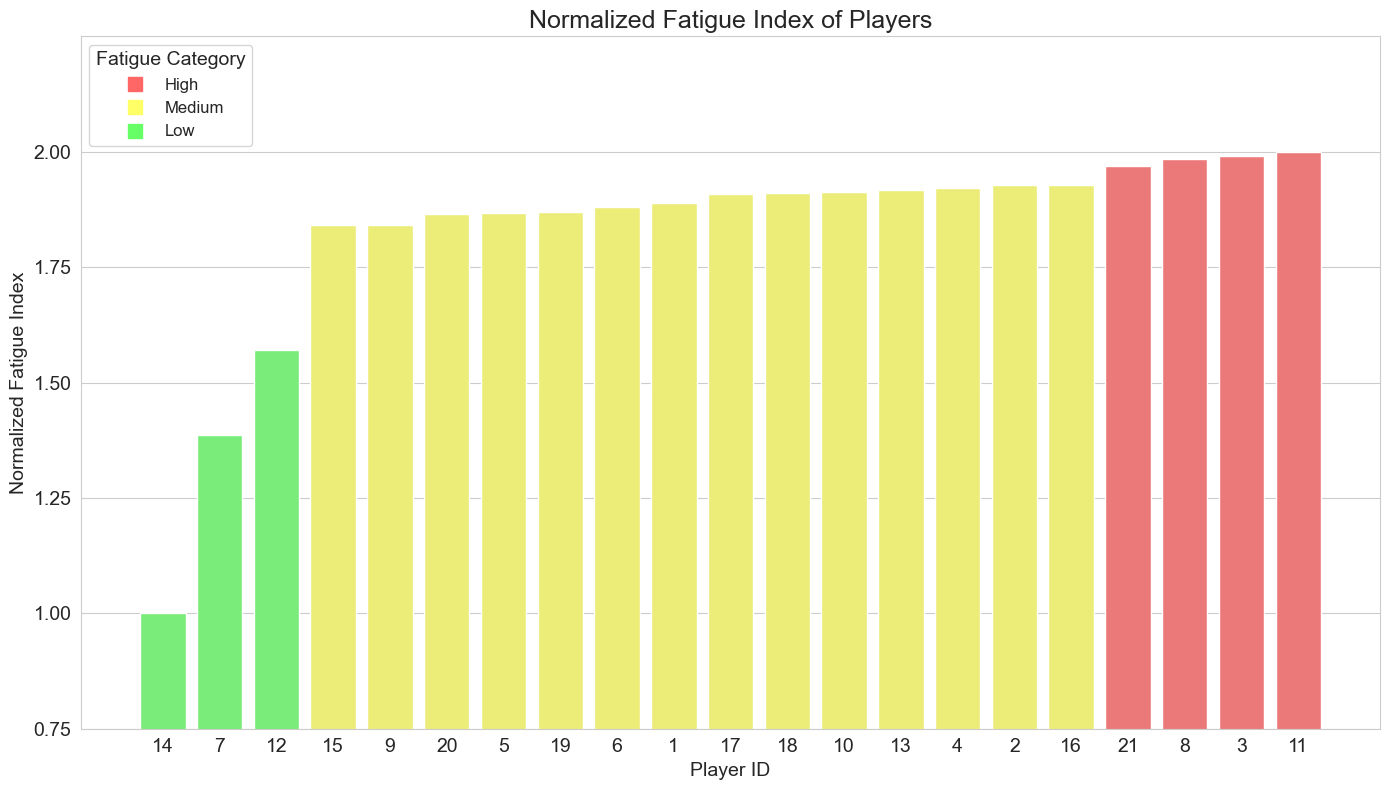

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the color palette for the bars based on fatigue categories
color_map = {
    "High": "#FF6666",  # Darker Red
    "Medium": "#FFFF66",  # Darker Yellow
    "Low": "#66FF66",  # Darker Green
}
colors = df_imp_lugano_match_sorted["Fatigue Category"].map(color_map)

# Plotting the data
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Using the 'order' parameter to ensure bars are plotted in the correct ascending order
bar_plot = sns.barplot(
    x="Player ID",
    y="Normalized Fatigue Index",
    data=df_imp_lugano_match_sorted,
    palette=colors,
    order=df_imp_lugano_match_sorted["Player ID"],
)
plt.title("Normalized Fatigue Index of Players", fontsize=18)
plt.xlabel("Player ID", fontsize=14)
plt.ylabel("Normalized Fatigue Index", fontsize=14)
plt.yticks([i for i in range(1, 3)], fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(0.75, 2.25)
bar_plot.set_yticks([i * 0.25 + 0.75 for i in range(6)])

# Add legend
for category, color in color_map.items():
    plt.plot([], [], " ", label=category, color=color, marker="s", markersize=10)
plt.legend(title="Fatigue Category", loc="upper left", fontsize=12, title_fontsize=14)
# Displaying the plot
plt.tight_layout()
plt.show()

### ANALYSIS OF AVERAGE FATIGUE INDEX OF TEAM BY PERIODS


#### PERIOD 1 : FATIGUE INDEX CALCULATION


In [208]:
# filter row by Description column i.e. Periods of the game : Period 1, Period 2, Period 3, Period 4


df_period1 = df_imp_lugano[df_imp_lugano["Description"].str.contains("Period 1")]

# Normalize the Mechanical Intensity column, so that the values are between 0 and 1

min_val = df_period1["Mechanical Intensity"].min()
max_val = df_period1["Mechanical Intensity"].max()

df_period1["Normalized Mechanical Intensity"] = (
    df_period1["Mechanical Intensity"] - min_val
) / (max_val - min_val)


# 1. Compute the  fatigue index for each row
df_period1["Fatigue Index"] = df_period1.apply(fatigue_index, axis=1)

# 2. Normalize the fatigue index
min_fatigue = df_period1["Fatigue Index"].min()
max_fatigue = df_period1["Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_period1["Normalized Fatigue Index"] = (df_period1["Fatigue Index"] - min_fatigue) / (
    max_fatigue - min_fatigue
) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_period1_sorted = df_period1.sort_values(
    by="Normalized Fatigue Index", ascending=True
)


# Calculate the average fatigue index of the players in period 1

avg_FI_period1 = df_period1_sorted["Fatigue Index"].mean()

print(avg_FI_period1)

df_period1_sorted

1.4638269712144625


C:\Users\samue\AppData\Local\Temp\ipykernel_17496\755726213.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period1["Normalized Mechanical Intensity"] = (
C:\Users\samue\AppData\Local\Temp\ipykernel_17496\755726213.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period1["Fatigue Index"] = df_period1.apply(fatigue_index, axis=1)
C:\Users\samue\AppData\Local\Temp\ipykernel_17496\755726213.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index
27,28,Goalies,Goalkeeper,Period 1,1736,278,1202,1,19.65,0.000000,0.695993,1.000000
32,33,Defense,D,Period 1,1736,1144,348,357,36.76,0.503087,1.015611,1.335854
39,40,Offense,F,Period 1,1736,1154,296,589,43.91,0.713320,1.394225,1.733702
35,36,Defense,D,Period 1,1736,1570,414,788,42.78,0.680094,1.420484,1.761295
30,31,Defense,D,Period 1,1736,1426,426,587,45.73,0.766833,1.423866,1.764848
37,38,Offense,F,Period 1,1736,1372,317,800,42.09,0.659806,1.425500,1.766565
21,22,Defense,D,Period 1,1736,1286,412,568,45.51,0.760365,1.439371,1.781141
29,30,Offense,F,Period 1,1736,1405,333,827,43.46,0.700088,1.480521,1.824381
22,23,Offense,F,Period 1,1736,1022,218,690,44.15,0.720376,1.521099,1.867021
26,27,Defense,D,Period 1,1736,1706,425,943,44.48,0.730079,1.527650,1.873905


#### PERIOD 2 : FATIGUE INDEX CALCULATION


In [209]:
df_period2 = df_imp_lugano[df_imp_lugano["Description"].str.contains("Period 2")]

# Normalize the Mechanical Intensity column, so that the values are between 0 and 1

min_val = df_period2["Mechanical Intensity"].min()
max_val = df_period2["Mechanical Intensity"].max()

df_period2["Normalized Mechanical Intensity"] = (
    df_period2["Mechanical Intensity"] - min_val
) / (max_val - min_val)


df_period2["Fatigue Index"] = df_period2.apply(fatigue_index, axis=1)

# 2. Normalize the fatigue index
min_fatigue = df_period2["Fatigue Index"].min()
max_fatigue = df_period2["Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_period2["Normalized Fatigue Index"] = (df_period2["Fatigue Index"] - min_fatigue) / (
    max_fatigue - min_fatigue
) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_period2_sorted = df_period2.sort_values(
    by="Normalized Fatigue Index", ascending=True
)


# Calculate the average fatigue index of the players in period 2

avg_FI_period2 = df_period2_sorted["Fatigue Index"].mean()

print(avg_FI_period2)

df_period2_sorted

1.4623009219845824


C:\Users\samue\AppData\Local\Temp\ipykernel_17496\1174222034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period2["Normalized Mechanical Intensity"] = (
C:\Users\samue\AppData\Local\Temp\ipykernel_17496\1174222034.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period2["Fatigue Index"] = df_period2.apply(fatigue_index, axis=1)
C:\Users\samue\AppData\Local\Temp\ipykernel_17496\1174222034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index
48,49,Goalies,Goalkeeper,Period 2,2229,320,1197,3,19.84,0.000000,0.546387,1.000000
53,54,Defense,D,Period 2,2229,1743,494,661,34.81,0.518891,1.119746,1.475359
61,62,Offense,F,Period 2,2229,703,152,441,39.75,0.690121,1.385625,1.695793
56,57,Defense,D,Period 2,2229,1342,404,608,41.52,0.751473,1.385775,1.695918
60,61,Offense,F,Period 2,2229,1192,315,580,42.22,0.775737,1.403633,1.710723
42,43,Defense,D,Period 2,2229,1026,348,390,45.19,0.878683,1.414924,1.720084
59,60,Offense,F,Period 2,2229,1309,375,581,44.04,0.838821,1.450909,1.749918
51,52,Defense,D,Period 2,2229,1334,436,540,44.89,0.868284,1.468685,1.764656
47,48,Defense,D,Period 2,2229,1509,389,759,43.72,0.827730,1.505229,1.794954
54,55,Defense,F,Period 2,2229,1103,334,482,46.50,0.924090,1.510923,1.799675


#### PERIOD 3 : FATIGUE INDEX CALCULATION


In [210]:
df_period3 = df_imp_lugano[df_imp_lugano["Description"].str.contains("Period 3")]

# Normalize the Mechanical Intensity column, so that the values are between 0 and 1

min_val = df_period3["Mechanical Intensity"].min()
max_val = df_period3["Mechanical Intensity"].max()

df_period3["Normalized Mechanical Intensity"] = (
    df_period3["Mechanical Intensity"] - min_val
) / (max_val - min_val)

df_period3

df_period3["Fatigue Index"] = df_period3.apply(fatigue_index, axis=1)

# 2. Normalize the fatigue index
min_fatigue = df_period3["Fatigue Index"].min()
max_fatigue = df_period3["Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_period3["Normalized Fatigue Index"] = (df_period3["Fatigue Index"] - min_fatigue) / (
    max_fatigue - min_fatigue
) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_period3_sorted = df_period3.sort_values(
    by="Normalized Fatigue Index", ascending=True
)

# Calculate the average fatigue index of the players in period 3

avg_FI_period3 = df_period3_sorted["Fatigue Index"].mean()

print(avg_FI_period3)

df_period3_sorted

1.3671997994428162


C:\Users\samue\AppData\Local\Temp\ipykernel_17496\3626737483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period3["Normalized Mechanical Intensity"] = (
C:\Users\samue\AppData\Local\Temp\ipykernel_17496\3626737483.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period3["Fatigue Index"] = df_period3.apply(fatigue_index, axis=1)
C:\Users\samue\AppData\Local\Temp\ipykernel_17496\3626737483.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index
69,70,Goalies,Goalkeeper,Period 3,2074,282,1200,3,18.39,0.000000,0.589230,1.000000
74,75,Defense,D,Period 3,2074,1527,420,465,21.34,0.089611,0.596637,1.007292
64,65,Offense,F,Period 3,2074,712,179,384,39.99,0.656136,1.281769,1.681786
81,82,Offense,F,Period 3,2074,538,123,298,42.90,0.744532,1.357741,1.756579
80,81,Offense,F,Period 3,2074,1614,385,841,40.07,0.658566,1.365264,1.763984
77,78,Defense,D,Period 3,2074,2030,512,1011,40.20,0.662515,1.407411,1.805477
68,69,Defense,D,Period 3,2074,1579,401,755,42.64,0.736634,1.408131,1.806186
63,64,Defense,D,Period 3,2074,840,270,329,48.29,0.908262,1.430112,1.827826
79,80,Offense,F,Period 3,2074,1636,403,830,42.53,0.733293,1.434938,1.832577
75,76,Defense,F,Period 3,2074,782,197,386,46.82,0.863609,1.452200,1.849571


#### OVERTIME : FATIGUE INDEX CALCULATION


In [211]:
df_overtime = df_imp_lugano[df_imp_lugano["Description"].str.contains("Overtime")]

# Normalize the Mechanical Intensity column, so that the values are between 0 and 1

min_val = df_overtime["Mechanical Intensity"].min()
max_val = df_overtime["Mechanical Intensity"].max()

df_overtime["Normalized Mechanical Intensity"] = (
    df_overtime["Mechanical Intensity"] - min_val
) / (max_val - min_val)

df_overtime

df_overtime["Fatigue Index"] = df_overtime.apply(fatigue_index, axis=1)

# 2. Normalize the fatigue index
min_fatigue = df_overtime["Fatigue Index"].min()
max_fatigue = df_overtime["Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_overtime["Normalized Fatigue Index"] = (
    df_overtime["Fatigue Index"] - min_fatigue
) / (max_fatigue - min_fatigue) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_overtime_sorted = df_overtime.sort_values(
    by="Normalized Fatigue Index", ascending=True
)


# Calculate the average fatigue index of the players in overtime

avg_FI_overtime = df_overtime_sorted["Fatigue Index"].mean()

print(avg_FI_overtime)

df_overtime_sorted

1.2528037988659964


C:\Users\samue\AppData\Local\Temp\ipykernel_17496\2756432162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overtime["Normalized Mechanical Intensity"] = (
C:\Users\samue\AppData\Local\Temp\ipykernel_17496\2756432162.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overtime["Fatigue Index"] = df_overtime.apply(fatigue_index, axis=1)
C:\Users\samue\AppData\Local\Temp\ipykernel_17496\2756432162.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Normalized Mechanical Intensity,Fatigue Index,Normalized Fatigue Index
94,95,Defense,D,Overtime,129,92,27,12,25.67,0.130336,0.470073,1.000000
89,90,Goalies,Goalkeeper,Overtime,129,21,92,0,19.38,0.000000,0.713178,1.183922
86,87,Offense,F,Overtime,129,161,33,84,32.17,0.265023,1.042576,1.433128
90,91,Offense,F,Overtime,129,143,28,86,34.99,0.323456,1.141909,1.508279
97,98,Defense,D,Overtime,129,235,46,148,32.33,0.268338,1.254715,1.593622
92,93,Defense,D,Overtime,129,26,5,16,48.93,0.612308,1.266453,1.602502
99,100,Offense,F,Overtime,129,228,48,131,43.60,0.501865,1.448519,1.740245
100,101,Offense,F,Overtime,129,65,14,38,56.37,0.766473,1.459616,1.748640
93,94,Offense,F,Overtime,129,254,51,180,38.32,0.392458,1.496468,1.776520
85,86,Offense,F,Overtime,129,72,14,58,57.09,0.781392,1.695475,1.927080


### PLOT THE LINE CHART OF AVERAGE FATIGUE INDEX OF PLAYERS IN EACH PERIOD AND OVERTIME


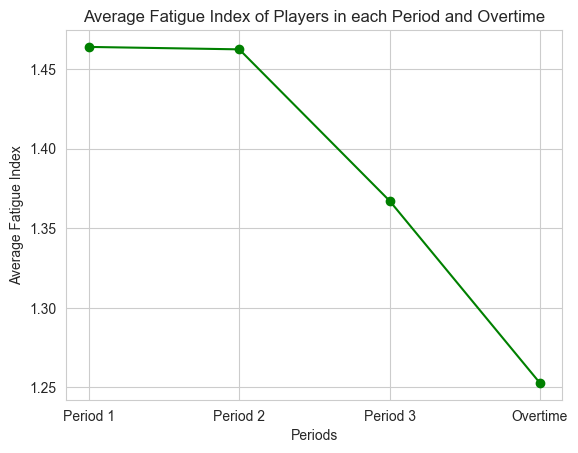

In [212]:
# Create a list of the average fatigue index of players in each period and overtime

avg_FI = [avg_FI_period1, avg_FI_period2, avg_FI_period3, avg_FI_overtime]

# Create a list of the periods and overtime

periods = ["Period 1", "Period 2", "Period 3", "Overtime"]

# Plot the line chart

plt.plot(periods, avg_FI, color="green", marker="o", linestyle="solid")
plt.title("Average Fatigue Index of Players in each Period")
plt.xlabel("Periods")
plt.ylabel("Average Fatigue Index")
plt.show()